In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pivottablejs import pivot_ui
import qgrid
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Impot Data

In [81]:
df = pd.read_csv('C:/Users/eilon_bd/תוכן מקצועי/Python Projects/SuperMarket_sales/supermarket_sales.csv')
sales=df.copy()

In [82]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [83]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour_of_the_day']=[r.hour for r in sales.Time]

In [84]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [85]:
qgrid.show_grid(sales)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [86]:
intercative_pivot_chart=pivot_ui(sales)

In [87]:
intercative_pivot_chart

# Data Visualisation

Preferd payment method

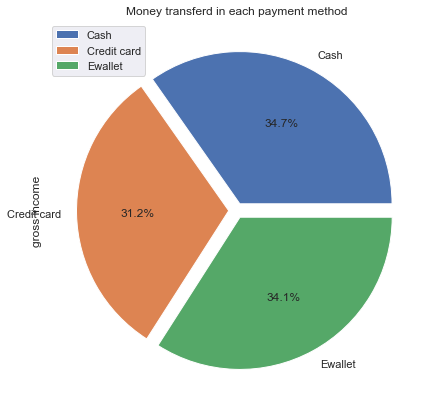

In [266]:
pie_chart=sales.groupby(['Payment']).sum().plot(kind='pie', y='gross income',figsize = (7,7), title='Money transferd in each payment method',explode=(0.05, 0.05,0.05),autopct='%1.1f%%')

Sales performance (City / Product line)

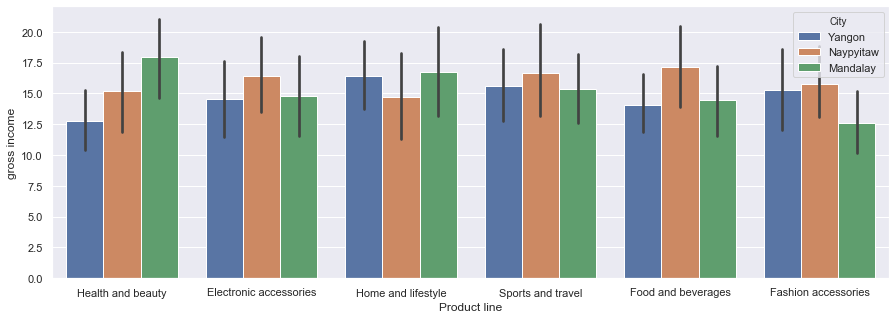

In [267]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x="Product line", y="gross income", hue="City", data=sales)

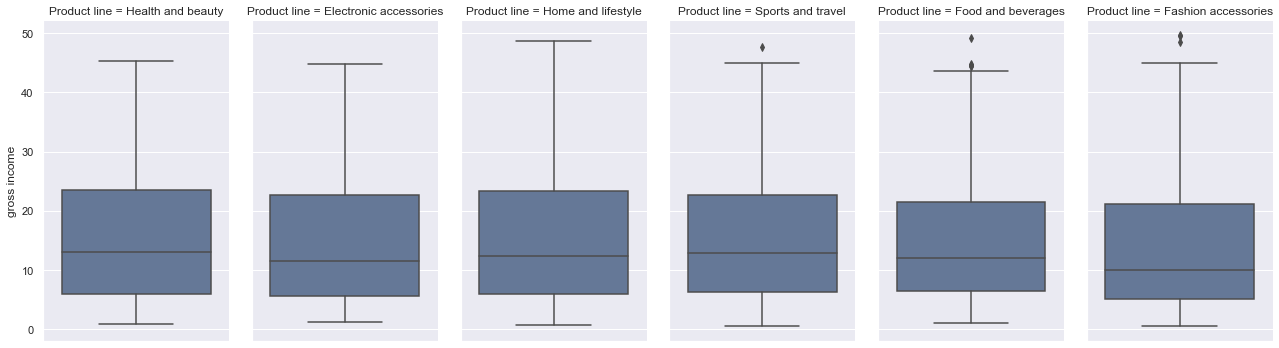

In [292]:
vioplot=sns.catplot(y="gross income", col="Product line",data=sales, saturation=.5,kind="box", ci=None, aspect=.6,margin_titles=True)

Average unit price and quantity sold in each product line

In [268]:
product_line_df=sales.groupby(['Product line']).mean()

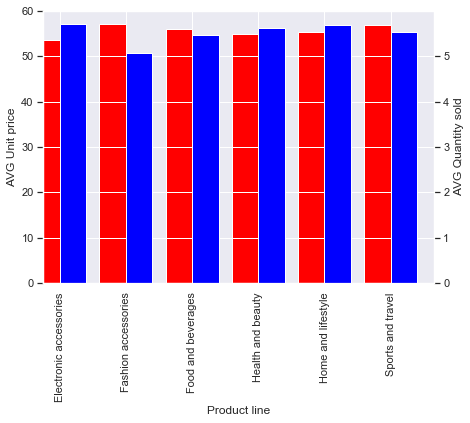

In [269]:
fig = plt.figure(figsize = (7,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
product_line_df['Unit price'].plot(x='Product line',kind='bar', color='red', ax=ax, width=width, position=1)
product_line_df['Quantity'].plot(x='Product line',kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('AVG Unit price')
ax2.set_ylabel('AVG Quantity sold')
plt.show()

Using SQL Lite syntex for analysis

In [288]:
from pandasql import sqldf

In [289]:
sales_sql=sales.copy()
sales_sql.columns=['Invoice_ID','Branch','City','Customer_type','Gender','Product_line','Unit_price','Quantity','Tax_5%','Total','Date','Time','Payment','cogs','gross_margin_percentage','gross income','Rating','Hour_of_the_day']

Analize activity per hour of the day

In [290]:
query = '''
SELECT Hour_of_the_day as hour, AVG(Total) as 'Total income from sales', AVG(Quantity) as 'Total Quantity sold'
FROM sales_sql
GROUP BY Hour_of_the_day;
    '''
hourly_revenue=sqldf(query)

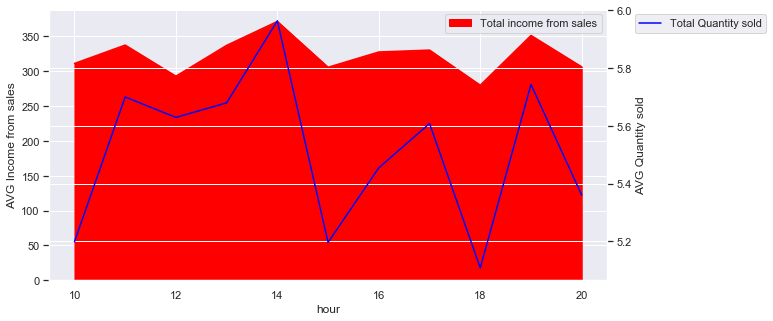

In [300]:
fig = plt.figure(figsize = (10,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
hourly_revenue.plot.area(x="hour", y="Total income from sales", legend=True, color='red',  ax=ax, )
hourly_revenue.plot(x="hour", y="Total Quantity sold",     legend=True, color='blue', ax=ax2, )
ax.set_ylabel('AVG Income from sales')
ax2.set_ylabel('AVG Quantity sold')
plt.legend(bbox_to_anchor=(1.05, 0.98), loc=2, borderaxespad=0.)
plt.show()

Comparing members to normal customers

In [286]:
query1 = '''
SELECT City, Customer_type as 'Customer type' ,strftime('%m', Date) as Month,SUM(Total) as 'Total income'
FROM sales_sql
GROUP BY City,Customer_type,strftime('%m', Date);
    '''
monthly=sqldf(query1)

<Figure size 720x360 with 0 Axes>

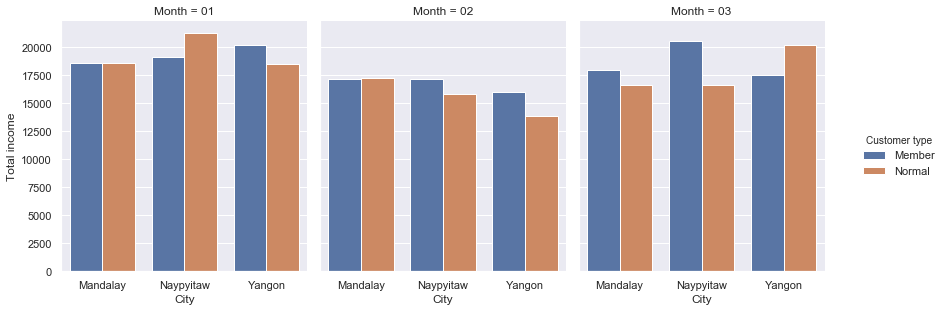

In [287]:
plt.figure(figsize = (10,5))
sns.catplot(x="City", y="Total income",
                hue="Customer type", col="Month",
                data=monthly, kind="bar",
                height=4.5, aspect=.9,margin_titles=True);

Rating by gemder and customer type

In [276]:
query3 = '''
SELECT Branch, Customer_type,Gender, AVG(Rating) as 'Avergae Rating'
FROM sales_sql
GROUP BY Branch, Customer_type,Gender;
    '''
rating=sqldf(query3)

<Figure size 720x360 with 0 Axes>

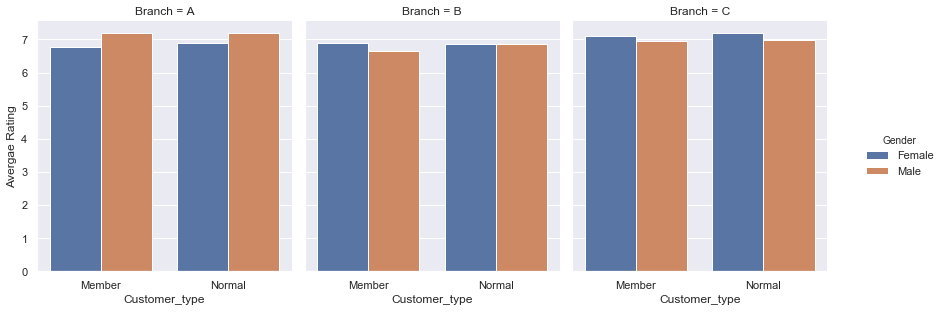

In [277]:
plt.figure(figsize = (10,5))
sns.catplot(x="Customer_type", y="Avergae Rating",
                hue="Gender", col="Branch",
                data=rating, kind="bar",
                height=4.5, aspect=.9,margin_titles=True);

Where is the most profitable to buy by product line

In [278]:
query2 = '''
SELECT Branch, Product_line as Catagory, AVG(Unit_price) as 'Avergae price'
FROM sales_sql
GROUP BY Branch, Product_line;
    '''
avg_price=sqldf(query2)

<Figure size 720x360 with 0 Axes>

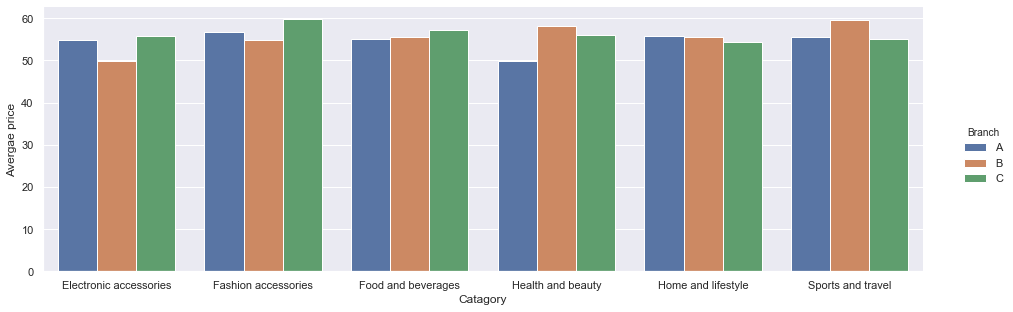

In [279]:
plt.figure(figsize = (10,5))
sns.catplot(x="Catagory", y="Avergae price",
                hue="Branch",
                data=avg_price, kind="bar",
                height=4.5, aspect=3,margin_titles=True);

Continuous demand by product line

In [280]:
demand_q = '''
SELECT Date,Product_line as Catagory, Quantity 
FROM sales_sql
ORDER BY Date;
    '''
demand=sqldf(demand_q)

In [281]:
demand['Date'] = pd.to_datetime(demand['Date'])

In [282]:
demend_df=demand.groupby('Catagory').resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')

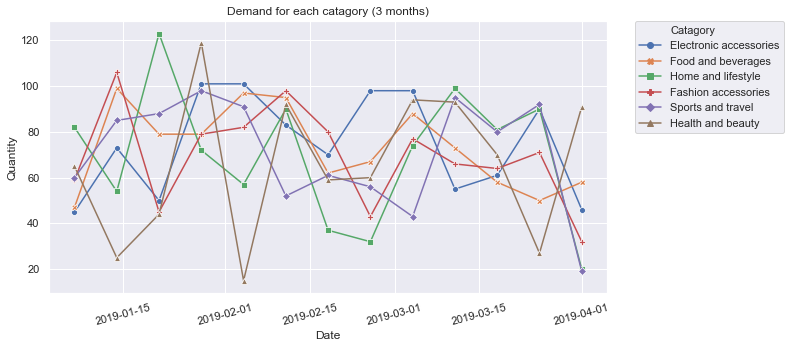

In [283]:
plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.lineplot(data=demend_df, x="Date", y="Quantity", hue="Catagory",style="Catagory",markers=True, dashes=False)
plt.xticks(rotation=15)
plt.title('Demand for each catagory (3 months)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()